https://matplotlib.org/users/intro.html

Matplotlib is a library for making 2D plots of arrays in Python.

* Has it's origins in emulating MATLAB, it can also be used in a Pythonic, object oriented way.  


* Easy stuff should be easy, difficult stuff should be possible

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


%matplotlib inline

Everything in matplotlib is organized in a hierarchy. At the top of the hierarchy is the matplotlib “state-machine environment” which is provided by the matplotlib.pyplot module. At this level, simple functions are used to add plot elements (lines, images, text, etc.) to the current axes in the current figure.

Pyplot’s state-machine environment behaves similarly to MATLAB and should be most familiar to users with MATLAB experience.
The next level down in the hierarchy is the first level of the object-oriented interface, in which pyplot is used only for a few functions such as figure creation, and the user explicitly creates and keeps track of the figure and axes objects. At this level, the user uses pyplot to create figures, and through those figures, one or more axes objects can be created. These axes objects are then used for most plotting actions.

## Scatter Plot

To start with let's do a really basic scatter plot:

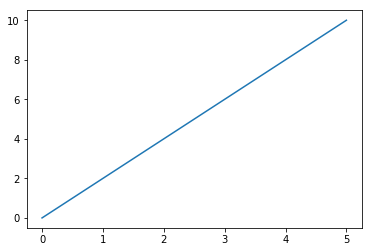

In [90]:
plt.plot([0, 1, 2, 3, 4, 5], [0, 2, 4, 6, 8, 10])

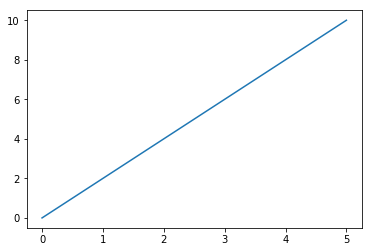

In [91]:
x = [0, 1, 2, 3, 4, 5]
y = [0, 2, 4, 6, 8, 10]
plt.plot(x, y)

What if we don't want a line?

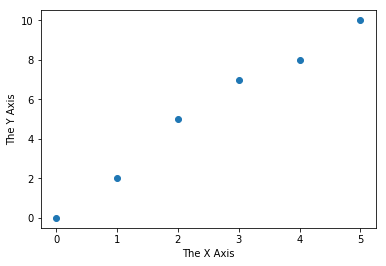

In [3]:
plt.plot([0, 1, 2, 3, 4, 5],
         [0, 2, 5, 7, 8, 10],
         marker='o',
         linestyle='')
plt.xlabel('The X Axis')
plt.ylabel('The Y Axis')

plt.show();

#### Simple example from matplotlib

https://matplotlib.org/tutorials/intermediate/tight_layout_guide.html#sphx-glr-tutorials-intermediate-tight-layout-guide-py

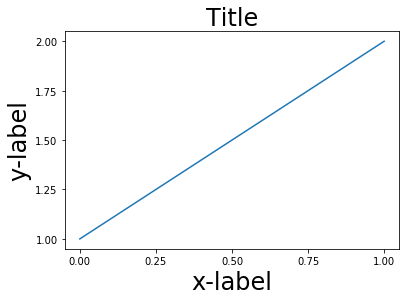

In [76]:
# plt.rcParams['savefig.facecolor'] = "0.8"
# fontsize


def example_plot(ax, fontsize=12):
    ax.plot([1, 2])

    ax.locator_params(nbins=5)
    ax.set_xlabel('x-label', fontsize=fontsize)
    ax.set_ylabel('y-label', fontsize=fontsize)
    ax.set_title('Title', fontsize=fontsize)

fig, ax = plt.subplots()
example_plot(ax, fontsize=24)

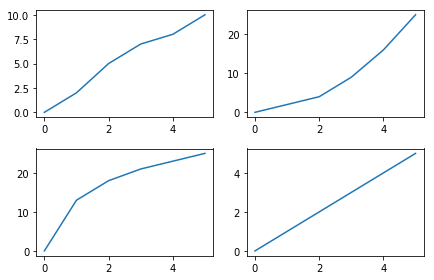

In [81]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
# fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True)
ax1.plot([0, 1, 2, 3, 4, 5],
         [0, 2, 5, 7, 8, 10])
ax2.plot([0, 1, 2, 3, 4, 5],
         [0, 2, 4, 9, 16, 25])
ax3.plot([0, 1, 2, 3, 4, 5],
         [0, 13, 18, 21, 23, 25])
ax4.plot([0, 1, 2, 3, 4, 5],
         [0, 1, 2, 3, 4, 5])
plt.tight_layout()

## Date Plotting

In [82]:
import pandas_datareader as pdr

df = pdr.get_data_fred('GS10')
df = df.reset_index()

print(df.info())

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
DATE    101 non-null datetime64[ns]
GS10    101 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.7 KB
None


,DATE,GS10
0,2010-01-01,3.73
1,2010-02-01,3.69
2,2010-03-01,3.73
3,2010-04-01,3.85
4,2010-05-01,3.42


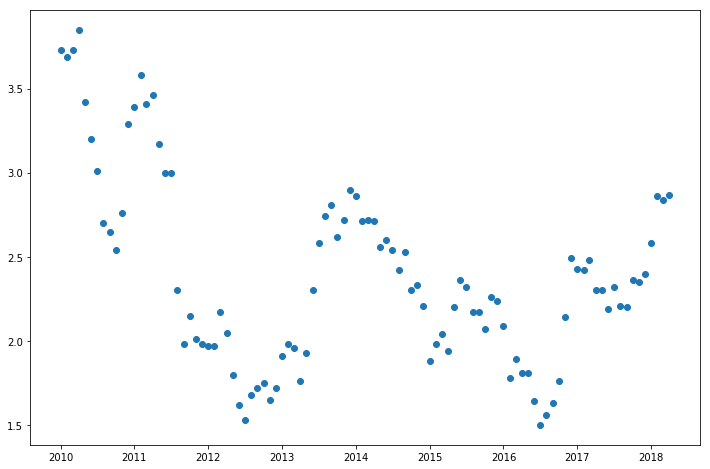

In [8]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

ax.plot_date(df['DATE'], df['GS10'])

Text(0.5,0,'Rolling Mean GS10')

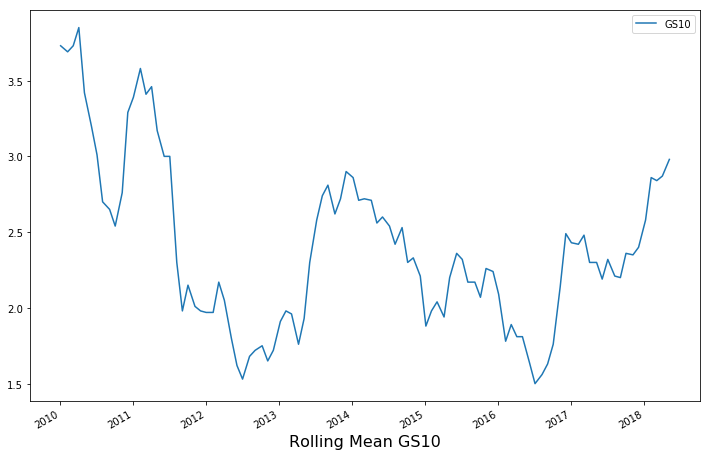

In [84]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

df.set_index('DATE') \
    .resample('W') \
    .mean() \
    .dropna().plot(ax=ax)

ax.set_xlabel('Year', fontsize=16)
ax.set_xlabel('Rolling Mean GS10', fontsize=16)

## Bar Plot

''

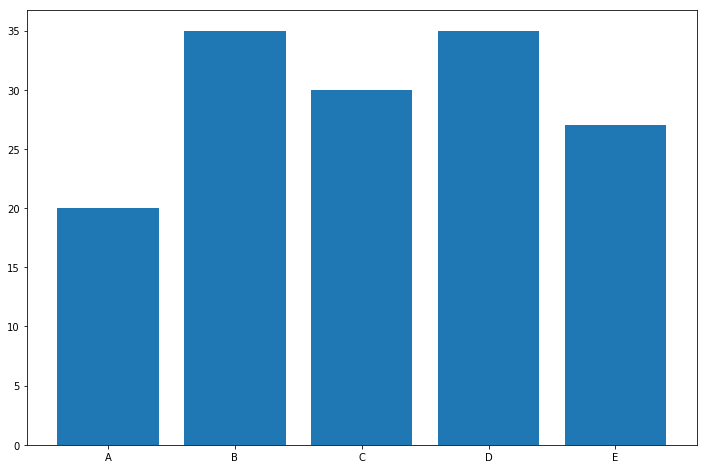

In [85]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

x_data = [0, 1, 2, 3, 4]
values = [20, 35, 30, 35, 27]
ax.bar(x_data, values)

ax.set_xticks(x_data)
ax.set_xticklabels(('A', 'B', 'C', 'D', 'E'))
;

## Matplotlib basics

http://pbpython.com/effective-matplotlib.html

### Behind the scenes

* matplotlib.backend_bases.FigureCanvas is the area onto which the figure is drawn  

* matplotlib.backend_bases.Renderer is the object which knows how to draw on the FigureCanvas  

* matplotlib.artist.Artist is the object that knows how to use a renderer to paint onto the canvas  


The typical user will spend 95% of their time working with the Artists.


https://matplotlib.org/tutorials/intermediate/artists.html#sphx-glr-tutorials-intermediate-artists-py

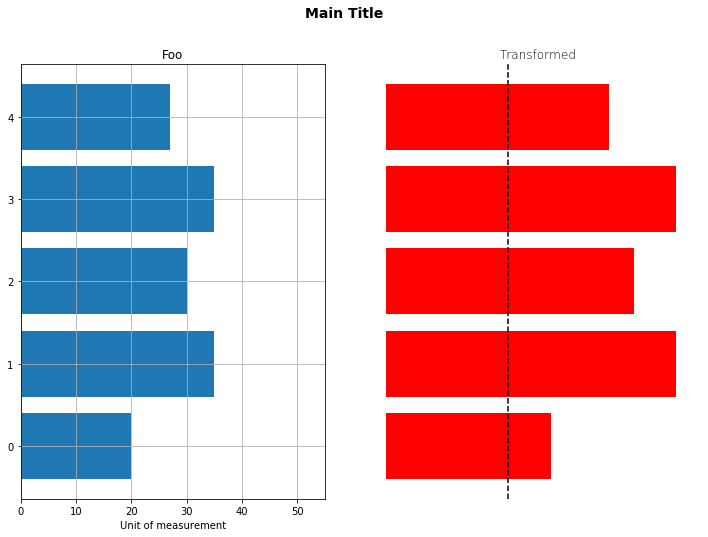

In [87]:
fig, (ax1, ax2) = plt.subplots(
    nrows=1,
    ncols=2,
    sharey=True,
    figsize=(12, 8))

fig.suptitle("Main Title", fontsize=14, fontweight='bold');

x_data = [0, 1, 2, 3, 4]
values = [20, 35, 30, 35, 27]

ax1.barh(x_data, values);
ax1.set_xlim([0, 55])
#ax1.set(xlabel='Unit of measurement', ylabel='Groups')
ax1.set(title='Foo', xlabel='Unit of measurement')
ax1.grid()


ax2.barh(x_data, [y / np.sum(values) for y in values], color='r');
ax2.set_title('Transformed', fontweight='light')
ax2.axvline(x=.1, color='k', linestyle='--')
ax2.set(xlabel='Unit of measurement') # Worth noticing this
ax2.set_axis_off();

fig.savefig('example_plot.png', dpi=80, bbox_inches="tight")